In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Data preparation
* getting information,shape of data
* dropping unrequired columns
* looking at labels unique values

In [2]:
df = pd.read_csv("Stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


((2838, 7), None)

In [4]:
not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1 = df.drop(not_used_cols,axis=1)
df1.sample(3)

,text,label
2273,"Hey, I recently came into a bit of money. I li...",0
2757,I'm 26. Tuesday is day one of therapy. Day one...,1
1420,I grew up my country’s equivalent of the bible...,1


In [5]:
df1['label'].unique()

array([1, 0], dtype=int64)

## Text processing
* importing required libraries (nltk,spacy,urllib,re etc.)
* downloading required database (omw), wordnet, punkt, stopwords
* cleaning data (with regualr expression)

In [6]:
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Regular expressions for cleaning text data

In [9]:
def textPocess(sent):
    try:
        # brackets replacing by space
        sent = re.sub('[][)(]',' ',sent)

        # url removing
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # removing escap characters
        sent = re.sub(r'\@\w+','',sent)

        # removing html tags 
        sent = re.sub(re.compile("<.*?>"),'',sent)

        # getting only characters and numbers from text
        sent = re.sub("[^A-Za-z0-9]",' ',sent)

        # lower case all words
        sent = sent.lower()
        
        # strip all words from sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # word tokenization
        tokens = word_tokenize(sent)
        
        # removing words which are in stopwords
        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        
        # lemmatization
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)
    

In [10]:
df1['processed_text'] = df1['text'].apply(lambda text: textPocess(text))
df1.sample(3)

,text,label,processed_text
2490,"What if they were met with a broken system, th...",0,met broken system same way wa tried get help m...
2799,I am just sick of this being my daily life. Be...,1,am sick this daily life derealization the hype...
2736,(One is 3 yrs old and the other 19) . Now my d...,0,one 3 yr old 19 dad would beat mom over course...


In [11]:
print("without process ----> ",df1['text'].iloc[23],end='\n\n')
print("after process ----> ",df1['processed_text'].iloc[23])

without process ---->  With a switch blade and open arms In a sweater vest that covers a ragged undershirt stained with my innocence Through faces that are never the same as the ones I dread finding in the crowd In the night, I rediscover my love of mares and how hoarse I can be in the morning It's the taste of blood but I am not bleeding

after process ---->  switch blade open arm a sweater vest cover a ragged undershirt stained innocence face are never same one dread finding crowd the night rediscover my love mare how hoarse can in the morning s the taste blood i not bleeding


## Vectorization / Word embedding
* BOW (Bag Of Words) / TF-IDF vectorizer
* converting it into dataframes

### --> BOW (Bag Of Word) / count vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1 
# min_df is used for removing terms that appear too infrequently. 
# For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". 

In [13]:
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(df1['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### --> TF-IDF (Term frequency - inverse document frequency)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(df1['processed_text'])
tf_df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
tf_df = pd.DataFrame(tf_df.toarray(),columns=tf.get_feature_names_out())
tf_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
tf_df.describe()

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,0.000452,0.000548,0.000123,0.000159,0.000109,0.000069,0.003358,0.001783,0.000576,0.000106,...,0.000078,0.000072,0.000204,0.000078,0.000715,0.000126,0.000245,0.000089,0.000054,0.000040
std,0.011158,0.009998,0.006576,0.006636,0.005801,0.003671,0.021354,0.017204,0.011156,0.005624,...,0.004145,0.003845,0.007786,0.004157,0.011797,0.004733,0.006851,0.004754,0.002873,0.002105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.348402,0.327600,0.350306,0.333106,0.309059,0.195542,0.258662,0.267281,0.310333,0.299611,...,0.220793,0.204838,0.336077,0.221471,0.306537,0.183335,0.268149,0.253283,0.153067,0.112136


In [19]:
cv_df.shape,tf_df.shape

((2838, 10271), (2838, 10271))

In [39]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming you've already transformed your df1['processed_text'] column with these vectorizers

# Save the CountVectorizer
cv = CountVectorizer(min_df=1)
cv_df = cv.fit_transform(df1['processed_text'])
cv_df.toarray()

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

# Save the TfidfVectorizer
tf = TfidfVectorizer(min_df=1)
tf_df = tf.fit_transform(df1['processed_text'])
tf_df.toarray()

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf, f)


## Model Building
* with BOW (Logistic Regression, MultonomialNB, RandomForestClassifier)
* with TF-IDF (Logistic Regression, MultonomialNB, RandomForestClassifier)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

###  --> For BOW

In [21]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,df1['label'],stratify=df1['label'])
X_train.shape,y_test.shape

((2128, 10271), (710,))

#### --------> Logistic Regression

In [22]:
model_lr = LogisticRegression().fit(X_train,y_train)
model_lr.score(X_train,y_train),model_lr.score(X_test,y_test)

(0.9971804511278195, 0.7295774647887324)

#### --------> Naive Bayes

In [23]:
model_nb = MultinomialNB().fit(X_train,y_train)
model_nb.score(X_train,y_train),model_nb.score(X_test,y_test)

(0.9234022556390977, 0.7408450704225352)

#### --------> Random Forest 

In [24]:
model_rf = RandomForestClassifier().fit(X_train,y_train)
model_rf.score(X_train,y_train),model_rf.score(X_test,y_test)

(0.9990601503759399, 0.7169014084507043)

### --> For TF-IDF

In [25]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(tf_df,df1['label'],stratify=df1['label'])
X_train1.shape,y_test1.shape

((2128, 10271), (710,))

#### --------> Logistic Regression

In [26]:
model_lr = LogisticRegression().fit(X_train1,y_train1)
model_lr.score(X_train1,y_train1),model_lr.score(X_test1,y_test1)

(0.9107142857142857, 0.7577464788732394)

#### --------> Naive Bayes

In [27]:
model_nb = MultinomialNB().fit(X_train1,y_train1)
model_nb.score(X_train1,y_train1),model_nb.score(X_test1,y_test1)

(0.8388157894736842, 0.7140845070422536)

#### --------> Random Forest 

### model_rf = RandomForestClassifier().fit(X_train1,y_train1)
model_rf.score(X_train1,y_train1),model_rf.score(X_test1,y_test1)

## Validation / calibration
* confusion matrix 
* classification report

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
y_pred = model_lr.predict(X_test1)
cm = confusion_matrix(y_pred,y_test1)
cm

array([[251,  85],
       [ 87, 287]], dtype=int64)

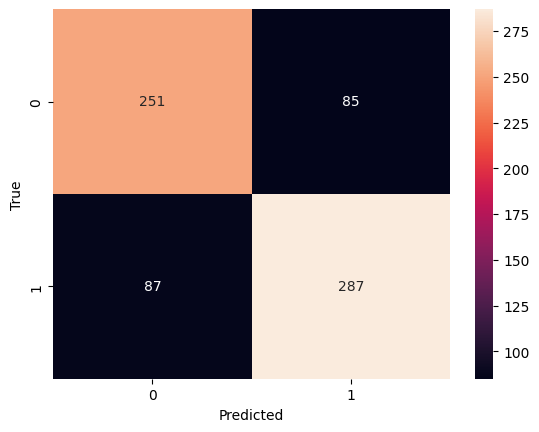

In [30]:
sns.heatmap(cm,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [31]:
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       336
           1       0.77      0.77      0.77       374

    accuracy                           0.76       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.76      0.76       710



## Generating predictions (Exciting part of notebook) 🤔

In [32]:
from sklearn.linear_model import LogisticRegression

# Train the model
lr = LogisticRegression()
lr.fit(tf_df, df1['label'])

# Check the model's accuracy on the training data
accuracy = lr.score(tf_df, df1['label'])
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 90.03%


In [33]:
def predictor(text):
    # Process the input text
    processed_text = textPocess(text)  # Assume textPocess is your preprocessing function

    # Transform the text into a vector
    embedded_words = tf.transform([processed_text])

    # Predict the label using the trained model
    res = lr.predict(embedded_words)

    # Interpret the prediction
    if res[0] == 1:
        return "This person is in stress."
    else:
        return "This person is not in stress."


In [34]:
# Example inputs
text1 = "I am sad."
text2 = "I am happy, I woke up early, played with friends, and enjoyed my day."
text3 = "I am calm."
text4 = "I am honest."

# Predictions
print(predictor(text1))  # Output: This person is in stress.
print(predictor(text2))  # Output: This person is not in stress.
print(predictor(text3))  # Output: This person is not in stress.
print(predictor(text4))  # Output: Prediction based on model


This person is in stress.
This person is not in stress.
This person is in stress.
This person is in stress.


In [35]:
import pickle

# Assuming 'lr' is your trained Logistic Regression model
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)  # Saving the 'lr' model


In [36]:
import pickle

# Loading the model from the saved file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)  # Loaded model

# Now, you can use 'loaded_model' to make predictions
# Example: loaded_model.predict(some_input_data)
